# Load all the necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "ggplot2"
%matplotlib inline
data=pd.read_csv('M:\Covid19\covid_19_india.csv')

## Summary

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675 entries, 0 to 3674
Data columns (total 9 columns):
Sno                         3675 non-null int64
Date                        3675 non-null object
Time                        3675 non-null object
State/UnionTerritory        3675 non-null object
ConfirmedIndianNational     3675 non-null object
ConfirmedForeignNational    3675 non-null object
Cured                       3675 non-null int64
Deaths                      3675 non-null int64
Confirmed                   3675 non-null int64
dtypes: int64(4), object(5)
memory usage: 258.5+ KB


### Attributes like mean , median , mode , count , maximum , percentage ,etc will be shown

In [12]:
data.describe()

,Sno,Cured,Deaths,Confirmed
count,3675.000000,3675.000000,3675.000000,3675.000000
mean,1838.000000,2064.320272,124.688435,4114.002449
std,1061.025447,7253.916594,551.776148,13889.061961
min,1.000000,0.000000,0.000000,0.000000
25%,919.500000,2.000000,0.000000,21.000000
50%,1838.000000,43.000000,2.000000,216.000000
75%,2756.500000,887.000000,29.000000,2302.000000
max,3675.000000,93154.000000,8053.000000,180298.000000


### Statewise Insights in a Tabular Fashion for better understanding

In [66]:
# Statewise Insights
state_details = pd.pivot_table(data, values=['Confirmed','Deaths','Cured'], index='State/UnionTerritory', aggfunc='max')
# Calculating the Recovery rate statewise rounding it upto 2 decimals
# Likewise for Death Rate
state_details['Death Rate'] = round(state_details['Deaths'] /state_details['Confirmed'], 2)
#Likewise for Confirmed from highest to lowest
state_details = state_details.sort_values(by='Confirmed', ascending= False).reset_index(level=0)
# For styling
state_details.style.background_gradient(cmap='Spectral')

,State/UnionTerritory,Confirmed,Cured,Deaths,Death Rate
0,Maharashtra,180298,93154,8053,0.04
1,Tamil Nadu,94049,52926,1264,0.01
2,Delhi,89802,59992,2803,0.03
3,Gujarat,33232,24030,1867,0.06
4,Uttar Pradesh,24056,16629,718,0.03
5,West Bengal,19170,12528,683,0.04
6,Rajasthan,18312,14574,421,0.02
7,Telangana,17357,8082,267,0.02
8,Karnataka,16514,8063,253,0.02
9,Andhra Pradesh,15252,6988,193,0.01


### Even better Tabular understanding to get latest number

In [58]:
covid1=data.drop(['Sno','ConfirmedIndianNational','ConfirmedForeignNational'], axis=1)
covid1=covid1[covid1['State/UnionTerritory'] !='Cases being reassigned to states']
covid1.tail()

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
3669,02/07/20,8:00 AM,Telangana,8082,267,17357
3670,02/07/20,8:00 AM,Tripura,1093,1,1396
3671,02/07/20,8:00 AM,Uttarakhand,2317,41,2947
3672,02/07/20,8:00 AM,Uttar Pradesh,16629,718,24056
3673,02/07/20,8:00 AM,West Bengal,12528,683,19170


### Visualisation for Covid19 India Cured/Recovered Cases

In [59]:
fig = px.line(covid1, x="Date", y="Cured", title='Covid19 India Cured/Recovered Cases',color='State/UnionTerritory')
fig.show()

### Visualisation for Covid19 India Cured/Recovered Cases in Uttar Pradesh

In [60]:
UP=covid1[covid1['State/UnionTerritory']=='Uttar Pradesh']
fig = px.line(UP, x="Date", y="Cured", title='Cured/Recovered due to Covid19 in Uttar Pradesh')
fig.show()

### Visualisation for Death Cases in Uttar Pradesh due to Covid19

In [61]:
UP=covid1[covid1['State/UnionTerritory']=='Uttar Pradesh']
fig = px.line(UP, x="Date", y="Deaths", title='Death Cases due to Covid19 in Uttar Pradesh')
fig.show()

### Visualisation for Confirmed Cases in Uttar Pradesh due to Covid19

In [64]:
UP=covid1[covid1['State/UnionTerritory']=='Uttar Pradesh']
fig = px.line(UP, x="Date", y="Confirmed", title='Confirmed Cases due to Covid19 in Uttar Pradesh')
fig.show()

### Confirmed Cases due to Corona in Delhi

In [18]:
Del=covid1[covid1['State/UnionTerritory']=='Delhi']
fig = px.line(Del, x="Date", y="Cured", title='Confirmed Cases due to Covid19 in Delhi')
fig.show()

###  Death Cases due to Corona in Delhi

In [19]:
Del=covid1[covid1['State/UnionTerritory']=='Delhi']
fig = px.line(Del, x="Date", y="Deaths", title='Death Cases due to Covid19 in Delhi')
fig.show()

### Cured Corona Cases in Delhi

In [20]:
Del=covid1[covid1['State/UnionTerritory']=='Delhi']
fig = px.line(Del, x="Date", y="Cured", title='Recovered Cases due to Covid19 in Delhi')
fig.show()

### Density Curve

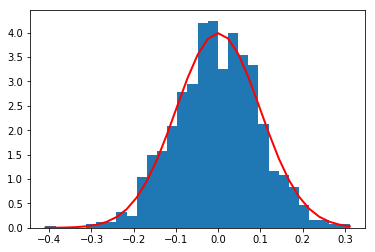

In [21]:
# generate random normal distribution
mu, sigma = 0, 0.1 # mean and standard deviation
covid1 = np.random.normal(mu, sigma, 1000)

# plot histogram with density curve 
count, bins, ignored = plt.hist(covid1, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ), 
         linewidth=2, color='r')
plt.show()

### Visualisation for Confirmed Cases including Indian National and Foreign Indian National

In [4]:
data['confirmed']=data.ConfirmedForeignNational+data.ConfirmedIndianNational

In [22]:
grouped = data.groupby('Date')['Date', 'Confirmed', 'Deaths'].sum().reset_index()

fig = px.line(grouped, x="Date", y="Confirmed",
              title="Indiawide Confirmed Cases Over Time")
fig.show()

fig = px.line(grouped, x="Date", y="Confirmed", 
              title="Indiawide Confirmed Cases (Logarithmic Scale) Over Time", 
              log_y=True)
fig.show()

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675 entries, 0 to 3674
Data columns (total 9 columns):
Sno                         3675 non-null int64
Date                        3675 non-null object
Time                        3675 non-null object
State/UnionTerritory        3675 non-null object
ConfirmedIndianNational     3675 non-null object
ConfirmedForeignNational    3675 non-null object
Cured                       3675 non-null int64
Deaths                      3675 non-null int64
Confirmed                   3675 non-null int64
dtypes: int64(4), object(5)
memory usage: 258.5+ KB


### Pie Chart for Confirmed Cases Statewise in India

In [38]:
fig = px.pie(data, 
             values='Confirmed', 
             names='State/UnionTerritory')
fig.show()

### Confirmed Cases in Delhi for the month of June

In [100]:
fig = px.bar( data.loc[(data['State/UnionTerritory']=='Delhi')&(data.Date >= '2020-01-05')].sort_values('Confirmed',ascending = False),x='Date', y='Confirmed',
             color="Confirmed",color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases in Delhi for the month of June')
fig.show()

### Death Cases due to COVID-19 cases in Delhi for the month of June

In [94]:
fig = px.bar( data.loc[(data['State/UnionTerritory']=='Delhi')&(data.Date >= '2020-01-05')].sort_values('Deaths',ascending = False),x='Date', y='Deaths',
             color="Deaths",color_continuous_scale=px.colors.sequential.Reds)
fig.update_layout(title_text='Death due to COVID-19 cases in Delhi for the month of June')
fig.show()

### Recovered Cased due to COVID-19 in Delhi for the month of June

In [102]:
fig = px.bar( data.loc[(data['State/UnionTerritory']=='Delhi')&(data.Date >= '2020-01-05')].sort_values('Cured',ascending = False),x='Date', y='Cured',
             color="Deaths",color_continuous_scale=px.colors.sequential.Oryel)
fig.update_layout(title_text='Recovered due to COVID-19 cases in Delhi for the month of June')
fig.show()